# 제 3절. 신고이슈 분석

# <font color='green'> 1. 데이터 불러오기
- soynlp 사용하여 인바운드콜의 text내용을 의미있는 단위인 token(단어, 형태소 등)을 정의, token은 corpus 리스트 형태로 정의

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
df = pd.read_pickle('../1399_data/1399_dataset.pkl')
df =  df[['신고일시', '신고내용(내용기재) 200자', '년도', '시도']]
df.columns = ['신고일시', '신고내용', '년도', '시도']
# 인바운드 콜 정보에 nan을 제거
df['신고내용'].fillna('조상', inplace=True)
df['신고내용'].isnull().sum()

0

In [3]:
df.isnull().sum()

신고일시     1401
신고내용        0
년도       1401
시도      19595
dtype: int64

# 실습용

In [4]:
df.shape
df.head()
df.tail()

(52884, 4)

,신고일시,신고내용,년도,시도
0,2015-01-02,"2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...",2015.0,NaN
1,2015-01-02,12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...,2015.0,NaN
2,2015-01-02,*유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...,2015.0,NaN
3,2015-01-02,"오늘 민원인께서 공군회관 맞은편 씨유편의점에서 `롯데 아몬드 빼빼로`를 구입하였고,...",2015.0,NaN
4,2015-01-02,12/31 소담(수입식품가게)에서 무장아찌구매하심.\n유통기한이 13.02.28까지...,2015.0,NaN


,신고일시,신고내용,년도,시도
52879,2019-12-31 17:26:00,<세븐일레븐 응암푸르지오점 유통기한 경과 제품 판매>\n민원인은 2019-12-30...,2019.0,NaN
52880,2019-12-31 11:28:00,<코랄칼슘마그네슘플러스비타민디 가품 의심> 한글 파일 첨부,2019.0,경기도
52881,2019-12-31 10:27:00,<노브랜드맛있는 군밤 곰팡이 이물 발견>\n민원인은 2019-12-11 노브랜드 마...,2019.0,서울특별시
52882,2019-12-31 09:16:00,"<브라질넛 위해성의심> \n민원인은 2019-12월 중순경, 이마트 트레이더스 구성...",2019.0,서울특별시
52883,2019-12-31 17:03:00,"<분말한천 이취>\n민원인은 2019-12-29 쿠팡(판매처: (주)우리가스토리, ...",2019.0,전라남도


## A. 신고콜 건별 문장길이, 단어 및 고유단어 수

Text(0.5, 1.0, '신고건 별 문장길이 분포')

Text(0.5, 1.0, '신고건 별 단어 수 분포')

Text(0.5, 1.0, '신고건 별 고유한 단어 수 분포')

신고건 별 문장길이 평균값 : 284.12376144013314
신고건 별 문장길이 중간값 264.0
신고건 별 단어 평균값 : 54.93544361243476
신고건 별 단어 중간값 50.0
신고건 별 고유 단어 평균값 : 51.623307616670445
신고건 별 고유 단어 중간값 48.0


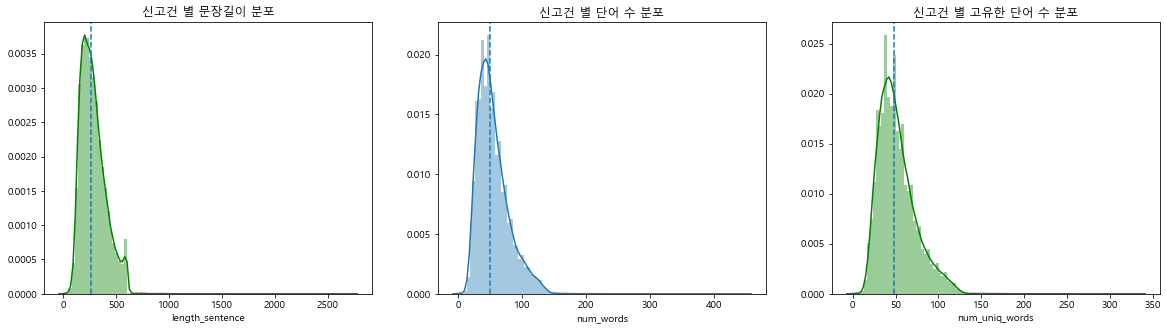

In [5]:
df['length_sentence'] = df['신고내용'].apply(lambda x: len(str(x))) # 문장길이
df['num_words'] = df['신고내용'].apply(lambda x: len(str(x).split())) # 단어 수
df['num_uniq_words'] = df['신고내용'].apply(lambda x: len(set(str(x).split()))) # 중복을 제거한 단어 수

fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

sns.distplot(df['length_sentence'], bins=100, color='g', ax=axes[0])
axes[0].axvline(df['length_sentence'].median(), linestyle='dashed')
axes[0].set_title('신고건 별 문장길이 분포')

sns.distplot(df['num_words'], bins=100, ax=axes[1])
axes[1].axvline(df['num_words'].median(), linestyle='dashed')
axes[1].set_title('신고건 별 단어 수 분포')

sns.distplot(df['num_uniq_words'], bins=100, color='g', ax=axes[2])
axes[2].axvline(df['num_uniq_words'].median(), linestyle='dashed')
axes[2].set_title('신고건 별 고유한 단어 수 분포')


print('신고건 별 문장길이 평균값 :', df['length_sentence'].mean()) ; print('신고건 별 문장길이 중간값', df['length_sentence'].median())
print('신고건 별 단어 평균값 :', df['num_words'].mean()); print('신고건 별 단어 중간값', df['num_words'].median())
print('신고건 별 고유 단어 평균값 :', df['num_uniq_words'].mean()) ; print('신고건 별 고유 단어 중간값', df['num_uniq_words'].median())

## B. Time

In [6]:
df['년도']=df['신고일시'].apply(lambda x: x.year)
df['월']=df['신고일시'].apply(lambda x: x.month)
df['요일']=df['신고일시'].apply(lambda x: x.weekday())

# <font color='green'> 2. 텍스트 전처리

In [7]:
from tqdm import tqdm_notebook
import re

def brush_clean (regex) :
    
    print('청소전', df.head(3))
    for pattern_string in tqdm_notebook(regex) :
        pattern = re.compile(pattern_string)
        df['신고내용'] = df['신고내용'].apply(lambda x : re.sub(pattern, ' ', str(x)))
    
    df['신고내용'] = df['신고내용'].apply(lambda x : "".join(x.replace("\n"," ")))
        
    return df['신고내용']

### 2.1 특수문자 제거

In [8]:
regex = ['[*]', '[.]', '[,]', '[-]', '[/]', "[`]", '["]',
        '[%]', '[?]', '[&]', '[$]', '\b', '\t', '[:]', '[)]', '[(]', '[>]', '[<]', '[:]']

brush_clean (regex)

청소전         신고일시                                               신고내용      년도   시도  \
0 2015-01-02  2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...  2015.0  NaN   
1 2015-01-02  12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...  2015.0  NaN   
2 2015-01-02  *유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...  2015.0  NaN   

   length_sentence  num_words  num_uniq_words    월   요일  
0              216         45              43  1.0  4.0  
1              347         76              69  1.0  4.0  
2              147         31              31  1.0  4.0  


0        2014 01 01   오뚜기옛날자른당면 을 개봉하여 조리를 하기 위해 물에 담가보...
1        12 30 여주마트에서 땅콩을 구매하심  1 1 제품을 개봉하여 드심  일부가 아니...
2         유통기한경과  민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 다...
3        오늘 민원인께서 공군회관 맞은편 씨유편의점에서  롯데 아몬드 빼빼로 를 구입하였고 ...
4        12 31 소담 수입식품가게 에서 무장아찌구매하심  유통기한이 13 02 28까지임...
                               ...                        
52879     세븐일레븐 응암푸르지오점 유통기한 경과 제품 판매  민원인은 2019 12 30 ...
52880                      코랄칼슘마그네슘플러스비타민디 가품 의심  한글 파일 첨부
52881     노브랜드맛있는 군밤 곰팡이 이물 발견  민원인은 2019 12 11 노브랜드 마산...
52882     브라질넛 위해성의심   민원인은 2019 12월 중순경  이마트 트레이더스 구성점...
52883     분말한천 이취  민원인은 2019 12 29 쿠팡 판매처   주 우리가스토리  경...
Name: 신고내용, Length: 52884, dtype: object

### 2.2 한글 혹은 영어로 시작하는 단어만 채택

In [9]:
regex = ['[^가-힣a-zA-Z\s]']

brush_clean (regex)

청소전         신고일시                                               신고내용      년도   시도  \
0 2015-01-02  2014 01 01   오뚜기옛날자른당면 을 개봉하여 조리를 하기 위해 물에 담가보...  2015.0  NaN   
1 2015-01-02  12 30 여주마트에서 땅콩을 구매하심  1 1 제품을 개봉하여 드심  일부가 아니...  2015.0  NaN   
2 2015-01-02   유통기한경과  민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 다...  2015.0  NaN   

   length_sentence  num_words  num_uniq_words    월   요일  
0              216         45              43  1.0  4.0  
1              347         76              69  1.0  4.0  
2              147         31              31  1.0  4.0  


0                     오뚜기옛날자른당면 을 개봉하여 조리를 하기 위해 물에 담가보...
1              여주마트에서 땅콩을 구매하심      제품을 개봉하여 드심  일부가 아니...
2         유통기한경과  민원인이  월  일 오전  시   분경 세븐일레븐 강남 호점에서 다...
3        오늘 민원인께서 공군회관 맞은편 씨유편의점에서  롯데 아몬드 빼빼로 를 구입하였고 ...
4              소담 수입식품가게 에서 무장아찌구매하심  유통기한이         까지임...
                               ...                        
52879     세븐일레븐 응암푸르지오점 유통기한 경과 제품 판매  민원인은            ...
52880                      코랄칼슘마그네슘플러스비타민디 가품 의심  한글 파일 첨부
52881     노브랜드맛있는 군밤 곰팡이 이물 발견  민원인은            노브랜드 마산...
52882     브라질넛 위해성의심   민원인은        월 중순경  이마트 트레이더스 구성점...
52883     분말한천 이취  민원인은            쿠팡 판매처   주 우리가스토리  경...
Name: 신고내용, Length: 52884, dtype: object

### 2.3 달랑 '한' 글자 제거
#### 동시에 더블스페이스이상은 모두 그냥 스페이스로 변경
#### /n도 모두 제거

In [10]:
df['신고내용'] = df['신고내용'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))
df['신고내용'].loc[27890]

'제이나초소스 변질의심 민원인은 중순경 다농마트식자재할인점 서울특별시 마포구 월드컵로 마포농수산물시장 에서 제이나초소스 소스류 제일유업 경기도 화성시 융건로 유통기한 구입하여 하나를 개봉함 개봉하여 보니 물과 소스가 분리되고 물이 뚝뚝 떨어짐 남은 제품은 개봉하지 않았으나 눈으로 물과 소스가 분리된 것이 보임 제품이 변질된 것으로 의심되어 원인조사 재발방지를 위해 신고접수함 사진전송함 현품보관중 사진전송시 제품의 회사에 전화를 했더니 너무 불성실하게 전화를 받아 이렇게 신고하게 됐으니 진상 규명에 최선을 다해 응해주시길바랍니다 참고로 저는 경희대 조리과 출신으로 호텔에서 년간 요리를 사람입니다 라고 같이 기재해주셨음'

# <font color='green'> 6. 연도별 키워드 특정 키워드(관심주제어) 트랜드 분석
- 연도별로 나누어서 주요 키워드 출력
- 시작년도, 끝년도 지정

## <font color='green'> 6.1. Option - A

In [11]:
# 관심주제어 불러오기
tf = pd.read_excel('../1399_data/관심주제어.xlsx')
tf.head(10)
len(tf['주제어'].to_list()) # 전체 관심주제어 (중복)
len(set(tf['주제어'].to_list())) # 전체 관신주에어 (No reducdancy)
interest_keywors = list(set(tf['주제어'].to_list()))

,유형,주제어,신유형
0,무허가/무신고 식품,무신고,위반
1,무허가/무신고 식품,무허가,위반
2,병원성 미생물 등에 오염된 위해우려 식품,대장균,미생물
3,병원성 미생물 등에 오염된 위해우려 식품,바이러스,미생물
4,병원성 미생물 등에 오염된 위해우려 식품,병원성균,미생물
5,병원성 미생물 등에 오염된 위해우려 식품,살모넬라,미생물
6,병원성 미생물 등에 오염된 위해우려 식품,식중독,미생물
7,병원성 미생물 등에 오염된 위해우려 식품,식중독,미생물
8,병원성 미생물 등에 오염된 위해우려 식품,장염,미생물
9,부패/변질된 위해 우려 식품,곰팡이,부패성


332

318

In [12]:
# 시작년도, 끝년도 지정
start_year = 2015
end_year = 2019
num = 500

result_df = pd.DataFrame()

# 관심주제어를 키워드로 해서
keyword_list = interest_keywors

# 녇도별 문서 추출 후 키워드 빈도수 분석
    
result_df = pd.DataFrame()
result_df2  = pd.DataFrame()

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    print(year)
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (df['신고일시'] >= start_date) & (df['신고일시'] <= end_date)
    temp_df = df[dt_index]
    s_ndocs = temp_df.shape[0]
    
    
    corpus_yearly = []

    for fn in temp_df['신고내용'] :
        corpus_yearly.append(fn)
    
    s_corpus_str = "".join(corpus_yearly)
    
    result_list = []
    result_list2 = []
    
    for k in keyword_list:
        result_list.append(s_corpus_str.count(k))  
        result_list2.append(s_corpus_str.count(k) / (s_ndocs+1))  
        
    temp_df = pd.DataFrame(result_list,columns=[str(year)])
    temp_df2 = pd.DataFrame(result_list2,columns=[str(year)])
    
    result_df = pd.concat([result_df,temp_df],axis=1)
    result_df2 = pd.concat([result_df2,temp_df2],axis=1)
    
result_df.index=  keyword_list
result_df
result_df2.index=  keyword_list
result_df2

2015
2016
2017
2018
2019



,2015,2016,2017,2018,2019
과.채주스,0,0,0,0,0
용기,129,177,251,263,279
GS슈퍼마켓,11,18,5,15,15
두유,35,46,64,52,36
밀도축,0,0,0,0,0
...,...,...,...,...,...
"강아지, 개, 고양이, 애완동물",0,0,0,0,0
사탕,36,34,43,53,35
중금속용출,0,0,0,0,0
레스토랑,5,6,5,7,5


,2015,2016,2017,2018,2019
과.채주스,0.000000,0.000000,0.000000,0.000000,0.000000
용기,0.015460,0.017092,0.023511,0.024142,0.025034
GS슈퍼마켓,0.001318,0.001738,0.000468,0.001377,0.001346
두유,0.004195,0.004442,0.005995,0.004773,0.003230
밀도축,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
"강아지, 개, 고양이, 애완동물",0.000000,0.000000,0.000000,0.000000,0.000000
사탕,0.004314,0.003283,0.004028,0.004865,0.003140
중금속용출,0.000000,0.000000,0.000000,0.000000,0.000000
레스토랑,0.000599,0.000579,0.000468,0.000643,0.000449


In [13]:
# 저장 파일 이름 설정
result_df2.to_excel('../1399_working/관심주제어_년도별분포.xlsx')

In [14]:
result_df2[0:5]
result_df2[0:5].T

,2015,2016,2017,2018,2019
과.채주스,0.000000,0.000000,0.000000,0.000000,0.000000
용기,0.015460,0.017092,0.023511,0.024142,0.025034
GS슈퍼마켓,0.001318,0.001738,0.000468,0.001377,0.001346
두유,0.004195,0.004442,0.005995,0.004773,0.003230
밀도축,0.000000,0.000000,0.000000,0.000000,0.000000


,과.채주스,용기,GS슈퍼마켓,두유,밀도축
2015,0.0,0.015460,0.001318,0.004195,0.0
2016,0.0,0.017092,0.001738,0.004442,0.0
2017,0.0,0.023511,0.000468,0.005995,0.0
2018,0.0,0.024142,0.001377,0.004773,0.0
2019,0.0,0.025034,0.001346,0.003230,0.0


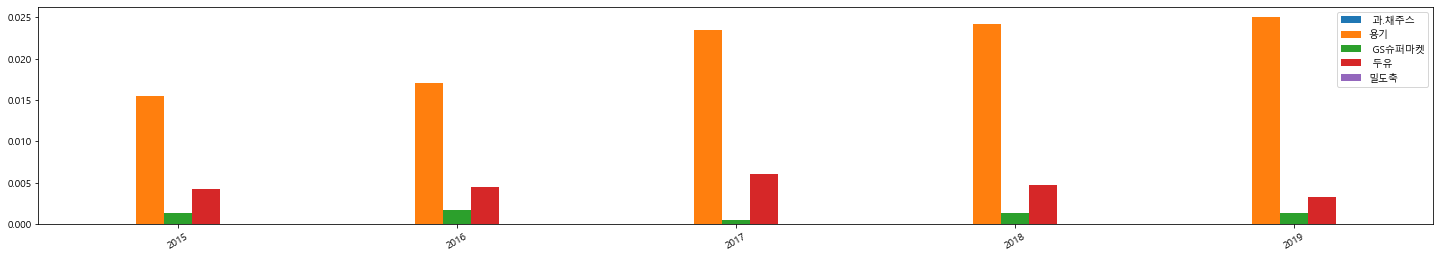

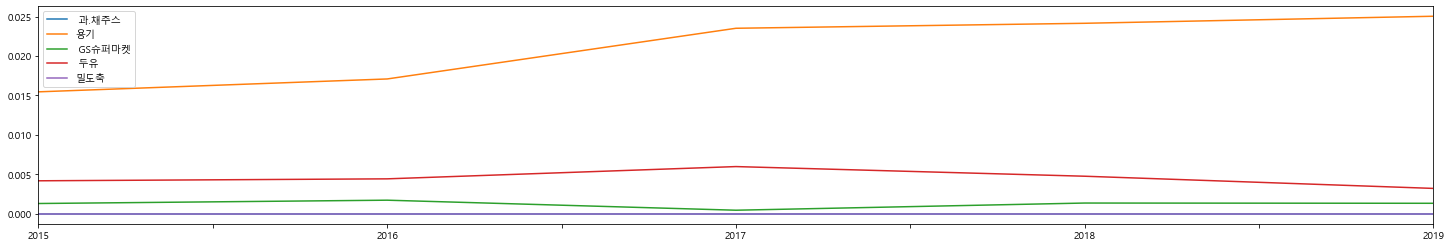

In [15]:
plt.rcParams['font.family']='Malgun Gothic'
# 막대그래프
result_df2[0:5].T.plot.bar(rot='30', figsize=(25,4))
plt.savefig('../1399_working/년도별주제어빈도수_막대.png')

# 라인그래프
result_df2[0:5].T.plot.line(figsize=(25,4))
plt.savefig('../1399_working/년도별주제어빈도수_분포.png')

# 관심어 유형별(23개 유형) 관심주제어 년도별 추이 확인하기

In [16]:
tf.head()

,유형,주제어,신유형
0,무허가/무신고 식품,무신고,위반
1,무허가/무신고 식품,무허가,위반
2,병원성 미생물 등에 오염된 위해우려 식품,대장균,미생물
3,병원성 미생물 등에 오염된 위해우려 식품,바이러스,미생물
4,병원성 미생물 등에 오염된 위해우려 식품,병원성균,미생물


In [17]:
keysInterestDic ={}
for i, group in tf.groupby('유형') :
    keysInterestDic.update( {i : list(set(group['주제어'].to_list()))} )
keysInterestDic.keys()

dict_keys(['무허가/무신고 식품', '병원성 미생물 등에 오염된 위해우려 식품', '부패/변질된 위해 우려 식품', '불량식품 관련 결과(피해)', '불법도축, 병든 고기나 그 원료로 만든 식품', '비위생적으로 제조/조리/재사용한 식품', '사용이 금지된 물질함유 식품', '성분, 규격에 맞지 않는 식품', '성분, 영양가, 신고사항 등 허위표시 식품', '성수식품(절기,계절,기념일)', '소비패턴', '수입 신고를 하지않고 반입된 식품', '식품분류', '어린이 현혹저가/저품질 정서저해식품', '언론 및 SNS 동향', '외식 트렌드', '원산지를 속인 식품', '유독/유해 물질이 함유된 식품용기/포장', '유독/유해한 물질이 함유된 위해 우려식품', '유통기한 위/변조식품', '유해물질 기준, 규격 부적합 식품', '제보성 신고', '제품의 성분(함량)품질, 가격을 속인 식품', '조사결과', '질병치료나 의약품으로 오인/혼동 광고식품'])

In [18]:
keysInterestDic_list =[]
for key in keysInterestDic :
    keysInterestDic_list.append(keysInterestDic[key])

for i in keysInterestDic_list :
    ','.join(i)

'무신고,무허가'

'장염,식중독,바이러스,병원성균,대장균,살모넬라'

'곰팡이,냄새,부패,구더기,썩은,상한,악취,변질,벌레,불량'

'배탈,두드러기,입원,복통,알레르기,식중독,약국,응급실,진료,치과,병원,설사,피해,내과,구토'

'밀도축,불법도축,밀도살,병든,불법도살,병사동물,질병감염동물,불량고기,기생충'

'대장균,강아지, 개, 고양이, 애완동물,위생제조기준위반,위생불량,반찬 재사용,재사용,세균수,기준치초과,비위생'

'비식용,유전자조작,멜라민,비식품,마약류,색소,미승인,GMO,불법첨가제,유통기한경과,사용금지,의약품'

'기준미달,성분함량 규격위반,품질규격위반,규격미달,부적합 성분'

'영양,허위표시,미표시,영양표시'

' 여행, 휴게소, 할머니, 관광, 군부대, 어르신, 선물, 아이, 영유아, 붕어빵,군인, 영아, 노인, 할아버지, 명절, 임산부, 빼빼로데이, 화이트데이, 설, 김치, 요양, 절임배추, 어린이, 빼빼로, 아이스크림, 사서함,추석, 케이크, 김장, 발렌타인데이, 유아, 대대'

' 카페, 병원, 이마트, 유흥업소, 옥션, 인터넷사이트, 배송, 홈플러스익스프레스, 11번가, GS슈퍼마켓, 롯데마트,편의점, 단란주점, 인터파크, 어플, 구내식당, 문구점, 코스트코, 세븐일레븐, 온라인, 마켓컬리,인터넷, 블로그, 홈쇼핑, G마켓, 미니스톱, 마트, 몰, 이마트24, 인스타, 위메프, 앱, 해외직구, 인터넷, 티몬, PC방, GS25, 쿠팡, CU, 애견카페, 홈플러스, 이마트애브리데이, 해외사업자, 노래방, 모바일, 문방구, 스터디카페'

'수입신고,밀반입,밀수입'

' 과.채주스, 간식, 과자, 생면, 성장기용조제유, 빵, 맘스터치, 크릴오일, 버거킹,축산물, 도시락, 고기, 패티,건강관련식품, 두유, 병, 컵라면, 커피, 전자레인지, 우유, 영아용조제유, 다이어트, 차, 곰탕, 스팸, 새싹보리, 유탕면, 건강기능식품, 데워먹는, 콜라, 탄산,즉석식품, 롯데리아, 껌,음료, 햇반, 레토르트, 숙면, 맥도날드, 라면봉지, 노니, 효능, 과.채음료, 효과, 햄버거, 뚜껑, 건면, 사탕, 라면, 면류, 치즈, 케이크,캔, 건강, 비타민, 주스, 버거'

'정서저해,어린이,미끼'

' 방송, 적발, 대장균 검출,식중독, TV, 사고, 티브이, 쇳가루, 식품위생법'

' 피자, 휴게소, 시켜먹음, 배달앱, 오토바이, 모범업소, 외식, 요기요, 짜장면, 레스토랑, 뷔페, 치킨,배달, 예식장, 포장, 맛집, 푸드트럭'

'원산지 미표시,원산지허위,원산지 속인,원산지 미표기'

'용기,증발잔류물,총용출량,중금속용출,포장,가소재,잔류규격위반,원료성분용출,가소제용출'

'곰팡이독소 ,발암물질,농약,패독,독성,색소,유해,버섯독,방부제,항생제,유독물질,동물용의약품'

'유통기한,유통기한 위변조,유통기한 미표시,유통기한 경과제품'

'중금속,유리,이취,이물감,성분검사,금속,방사능,이미,첨가물,곰팡이,벤조피렌,부적합,다이옥신,위반,이물질,벌레,동물용의약품,이물혼입,잔류농약,기준치초과,플라스틱'

' 알바, 근무,내부고발, 동종업계, 아르바이트'

'불향성분,불법증량,거짓,품질위조,중량미달,카라멜,불량품질,상표도용,가짜,유사성분혼입,짝퉁,함량미달,저급원료혼합,원료건전성불량'

' 판매중단, 폐기, 반복, 적합, 품목제조정지, 회수,행정처분, 오인, 부적합, 영업정지, 고발, 시험검사, 차단, 과태료, 시정명령'

'과대광고,허위과대광고,소비자혼동,허위과장'

## 동일한 관심주제어(index)는 삭제하기 위해 duplicated()

In [19]:
# 원래 데이터프레임 확인
result_df2.head()

# 주제어(index)를 컬럼으로 변경
tf = result_df2.reset_index()
# 동일한 주제어 개수 확인
tf[tf.duplicated(subset=['index'])].shape
# 리스트와 딕셔너리로 재확인
len(result_df2.reset_index()['index'].to_list()) - len(set(result_df2.reset_index()['index'].to_list()))
tf.head()
tf.shape

# 주제어(컬럼명)이 동일한 경우는 마지막 행만 남기고 삭제
tf = tf.drop_duplicates(subset=['index'], keep="last")
tf.shape
tf.head()

# 주제어(컬럼명)를 index로 다시 재변경하여 데이터프레임에 반영
tf.set_index('index', inplace =True)
tf.shape
tf.head()

,2015,2016,2017,2018,2019
과.채주스,0.000000,0.000000,0.000000,0.000000,0.000000
용기,0.015460,0.017092,0.023511,0.024142,0.025034
GS슈퍼마켓,0.001318,0.001738,0.000468,0.001377,0.001346
두유,0.004195,0.004442,0.005995,0.004773,0.003230
밀도축,0.000000,0.000000,0.000000,0.000000,0.000000


(0, 6)

0

,index,2015,2016,2017,2018,2019
0,과.채주스,0.000000,0.000000,0.000000,0.000000,0.000000
1,용기,0.015460,0.017092,0.023511,0.024142,0.025034
2,GS슈퍼마켓,0.001318,0.001738,0.000468,0.001377,0.001346
3,두유,0.004195,0.004442,0.005995,0.004773,0.003230
4,밀도축,0.000000,0.000000,0.000000,0.000000,0.000000


(318, 6)

(318, 6)

,index,2015,2016,2017,2018,2019
0,과.채주스,0.000000,0.000000,0.000000,0.000000,0.000000
1,용기,0.015460,0.017092,0.023511,0.024142,0.025034
2,GS슈퍼마켓,0.001318,0.001738,0.000468,0.001377,0.001346
3,두유,0.004195,0.004442,0.005995,0.004773,0.003230
4,밀도축,0.000000,0.000000,0.000000,0.000000,0.000000


(318, 5)

,2015,2016,2017,2018,2019
index,,,,,
과.채주스,0.000000,0.000000,0.000000,0.000000,0.000000
용기,0.015460,0.017092,0.023511,0.024142,0.025034
GS슈퍼마켓,0.001318,0.001738,0.000468,0.001377,0.001346
두유,0.004195,0.004442,0.005995,0.004773,0.003230
밀도축,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
tf != 0

,2015,2016,2017,2018,2019
index,,,,,
과.채주스,False,False,False,False,False
용기,True,True,True,True,True
GS슈퍼마켓,True,True,True,True,True
두유,True,True,True,True,True
밀도축,False,False,False,False,False
...,...,...,...,...,...
"강아지, 개, 고양이, 애완동물",False,False,False,False,False
사탕,True,True,True,True,True
중금속용출,False,False,False,False,False


In [95]:
def show(k) :
    # 막대그래프
    cols = keysInterestDic_list[k]
    tf.T[cols].plot.bar(rot='30', figsize=(25,4))
    # 라인그래프
    tf.T[cols].plot.line(figsize=(25,4))
    # 컬럼별 년도그래프
    sf = result_df2[(result_df2.T != 0).any()]
    sf.loc[cols].plot.bar(rot='30', figsize=(25,3))

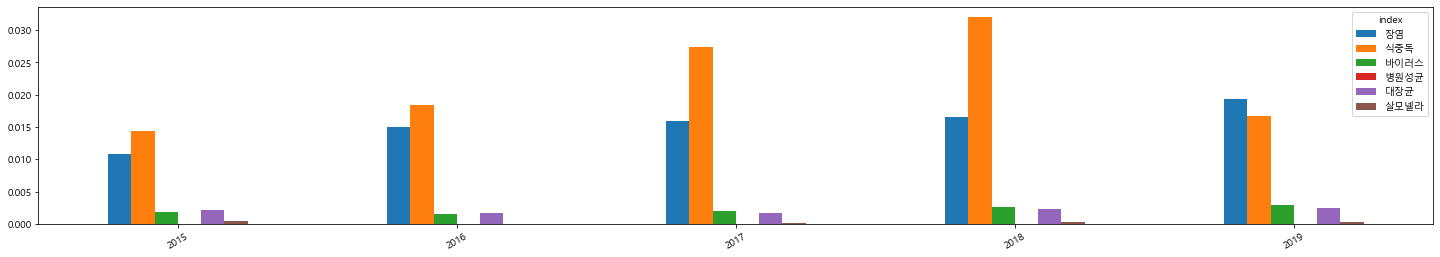

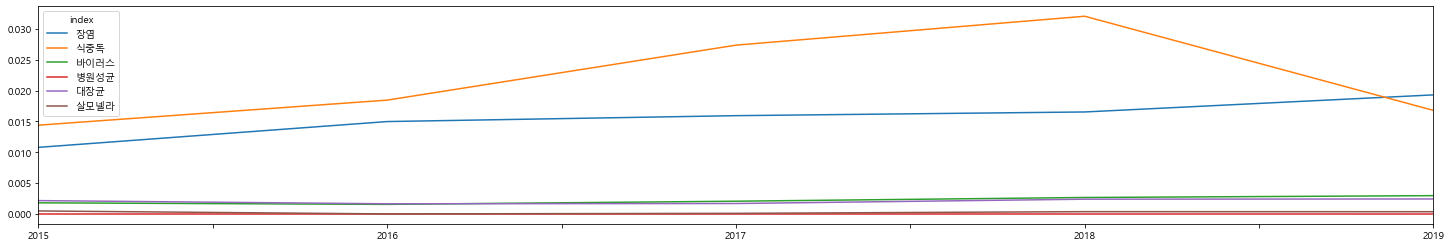

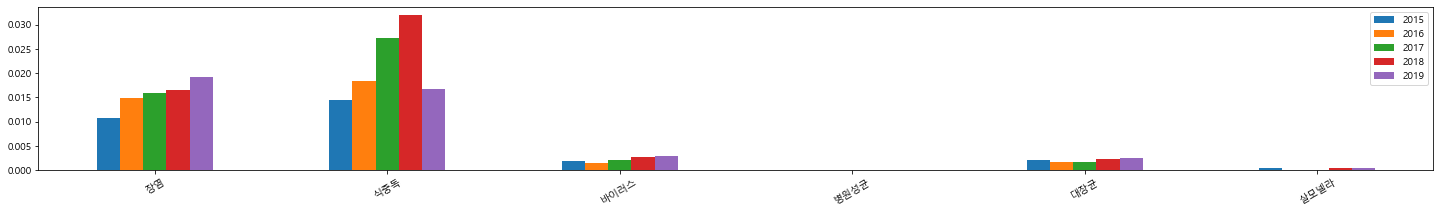

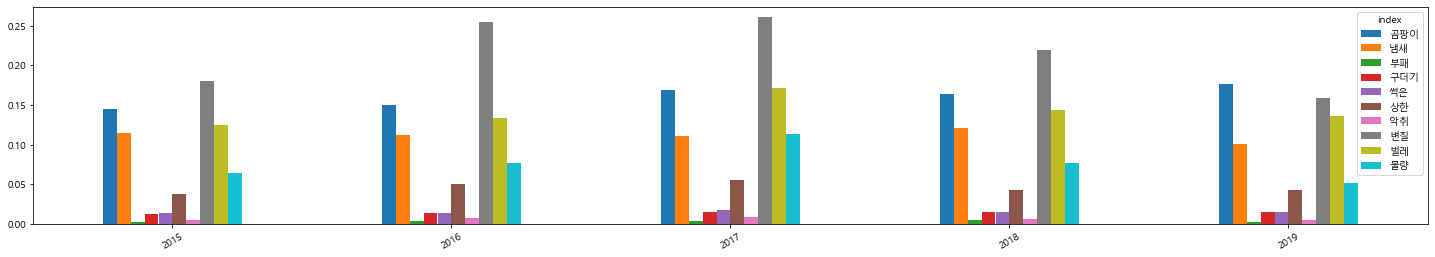

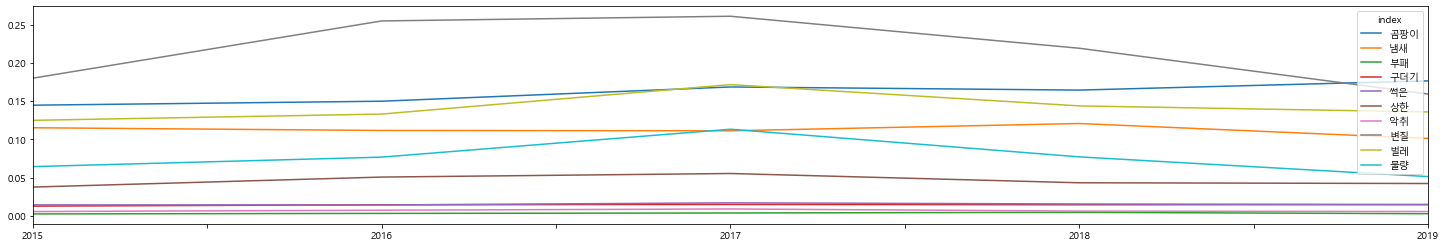

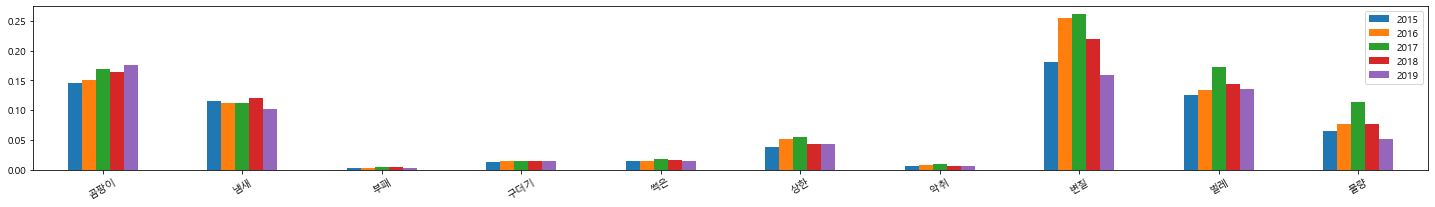

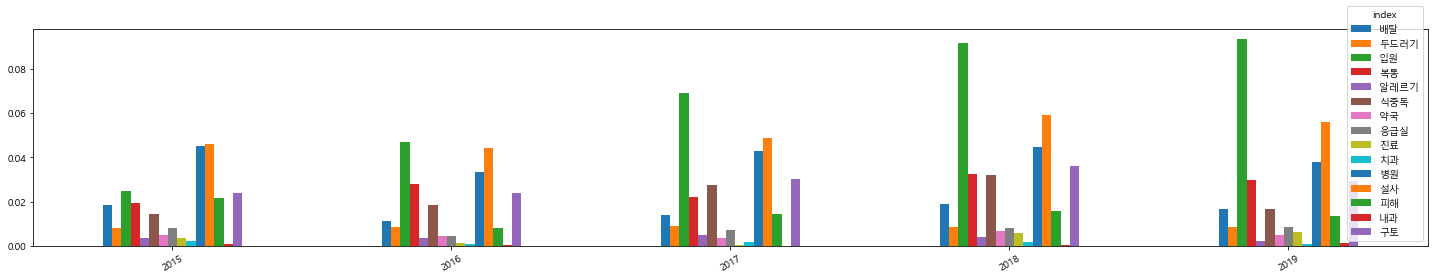

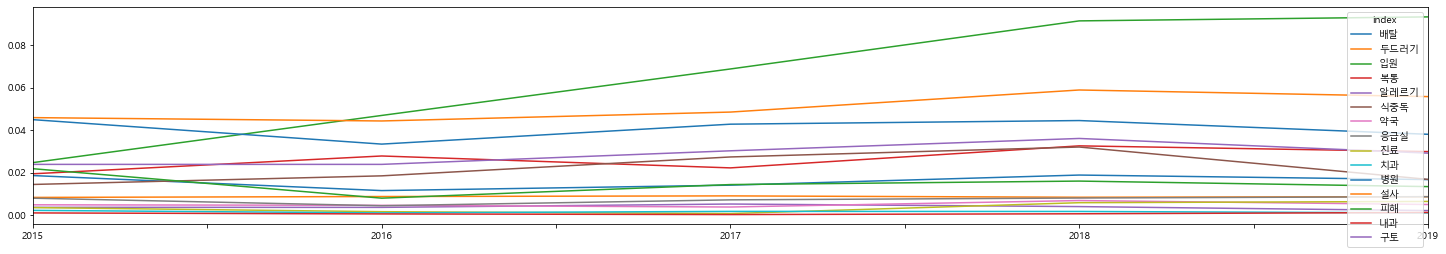

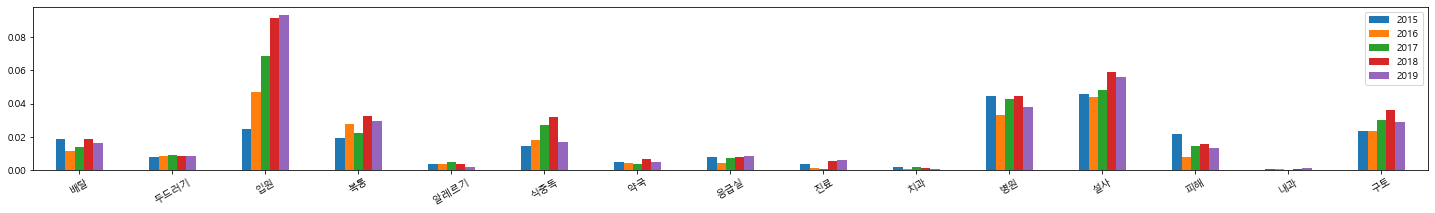

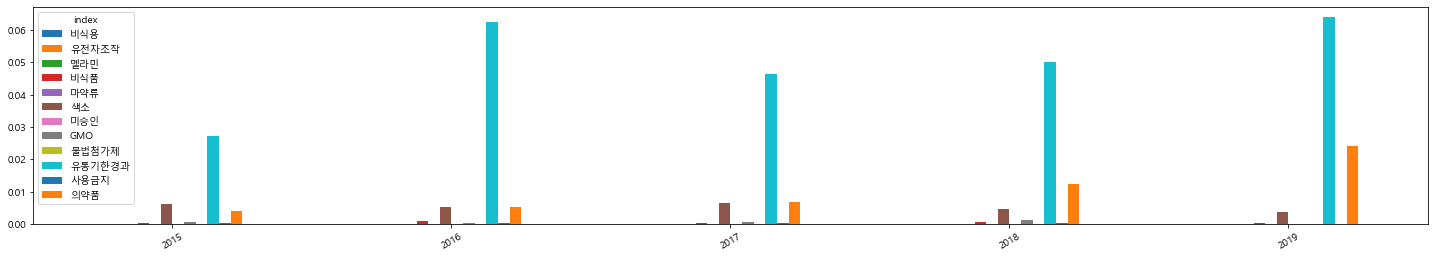

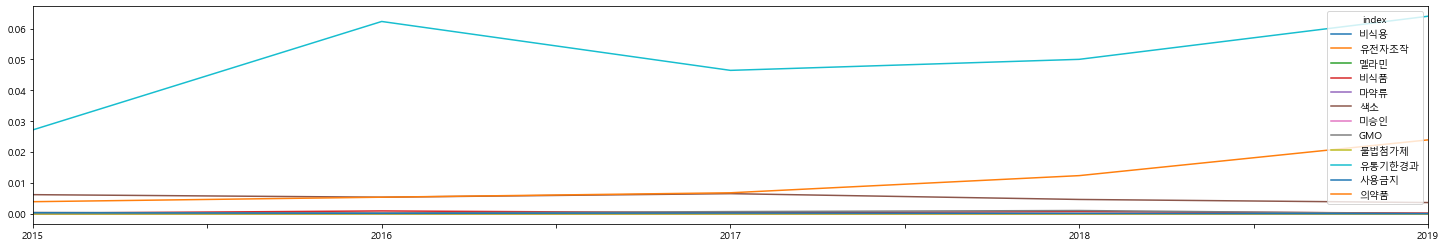

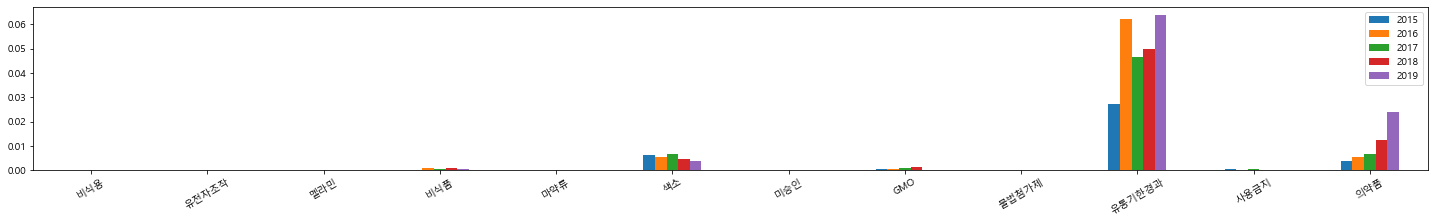

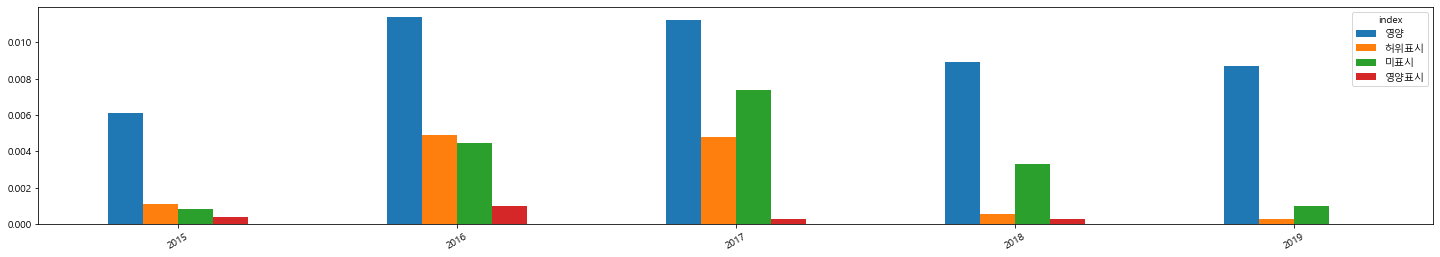

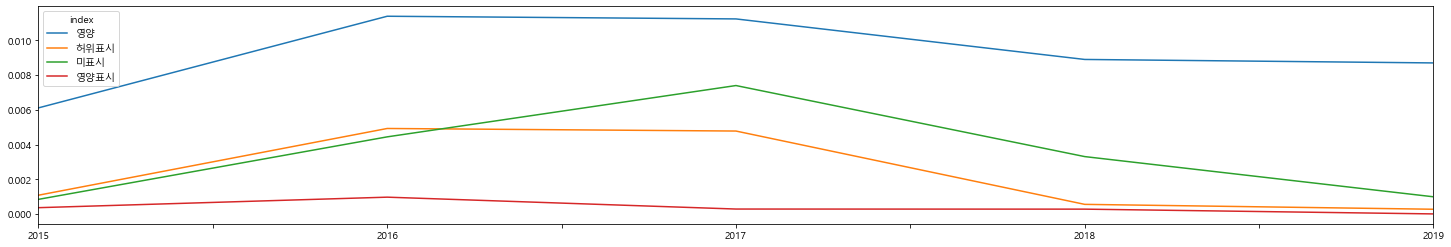

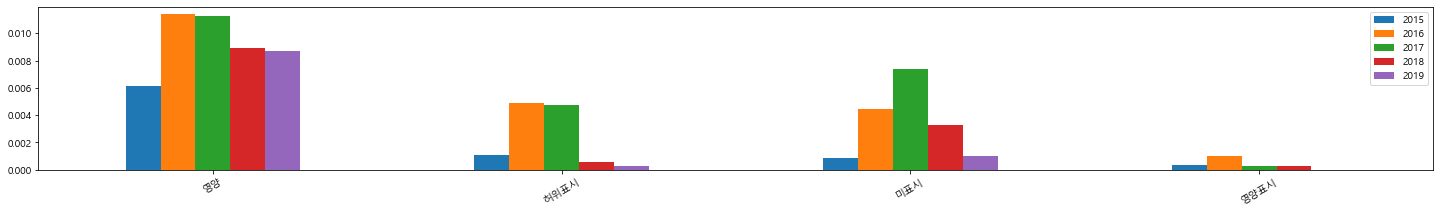

In [96]:
for i in [1,2,3,6,8] : # 주요 관심 키워드
    show(i)

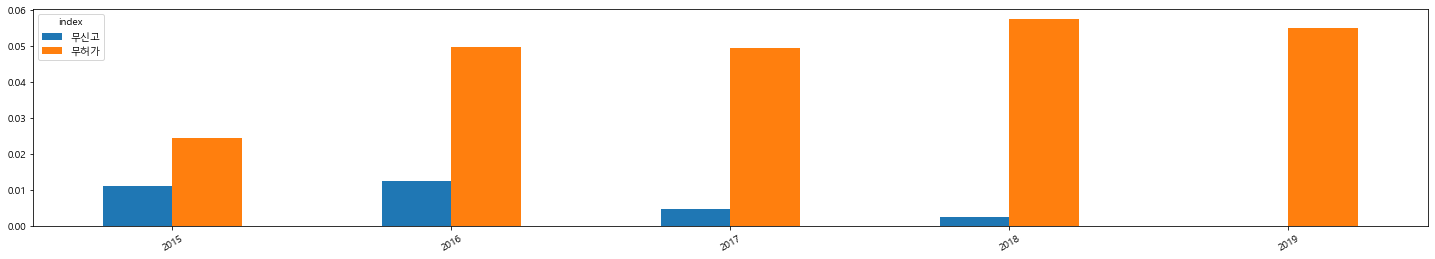

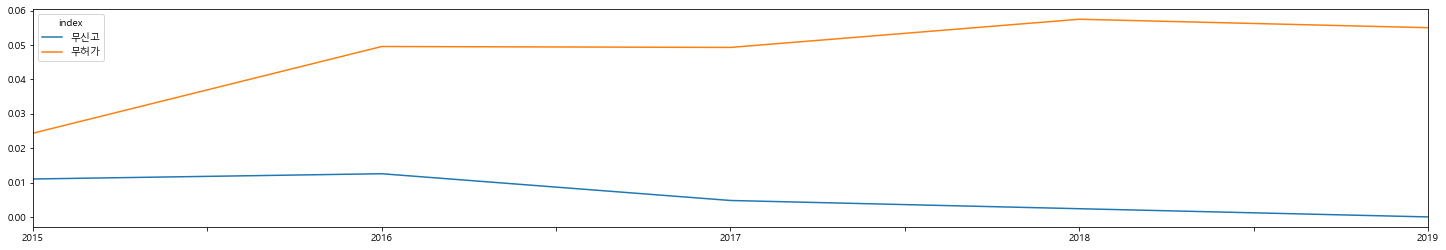

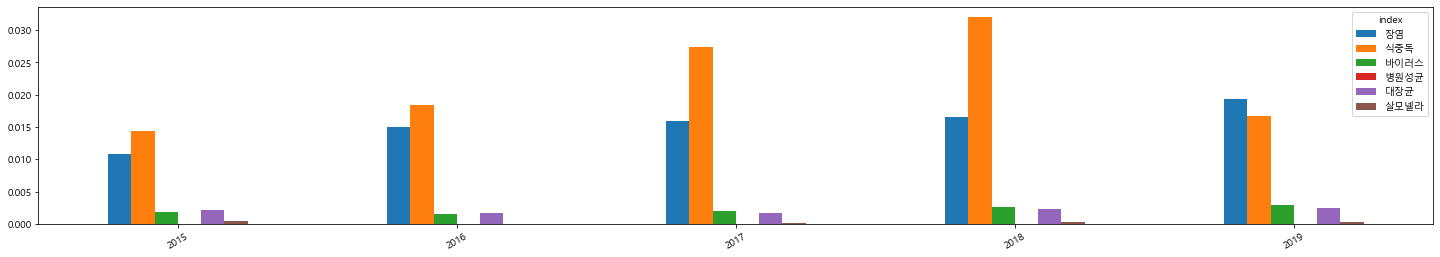

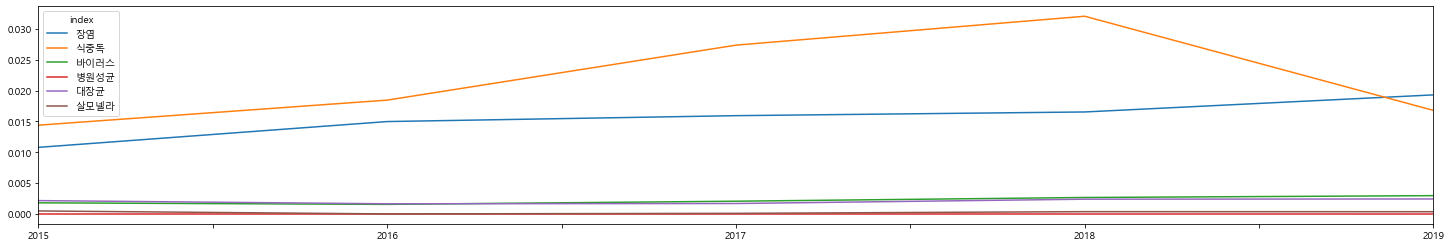

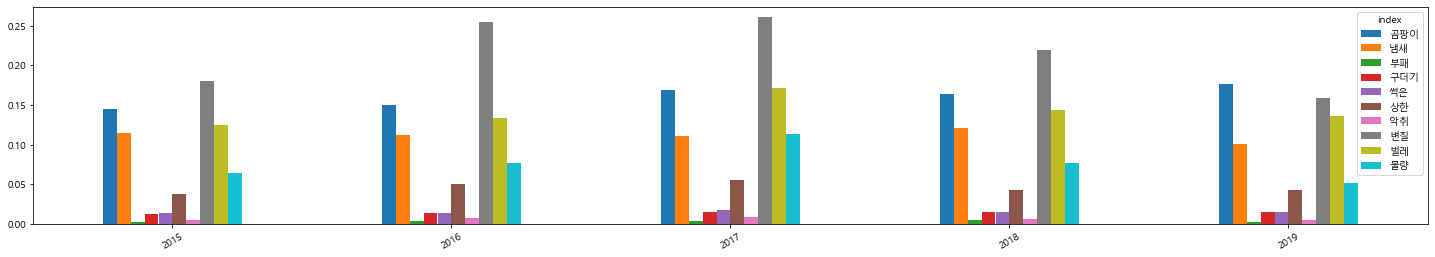

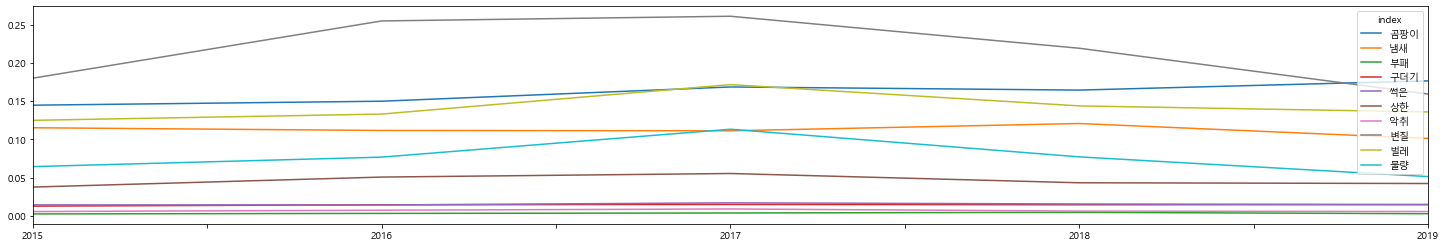

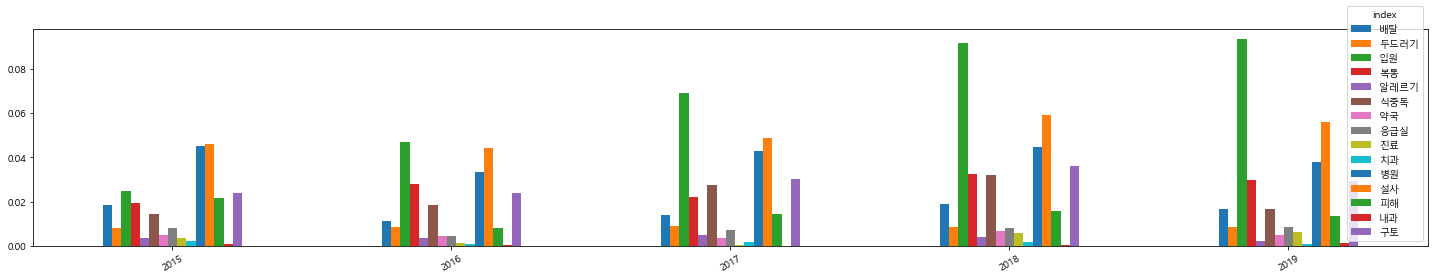

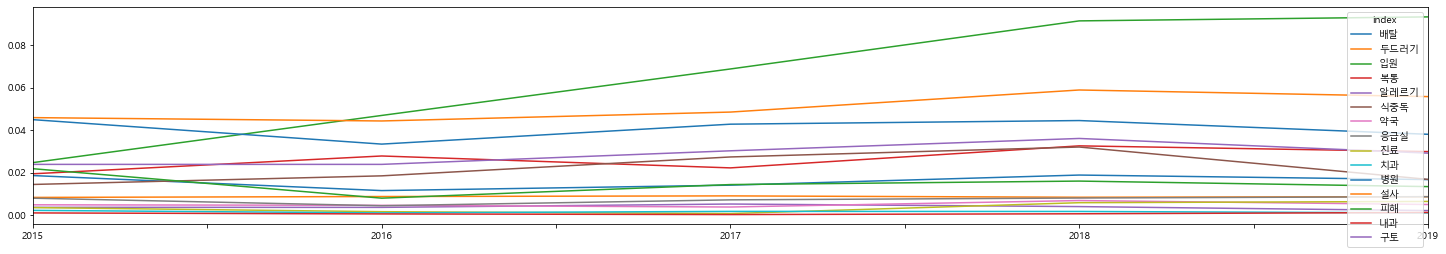

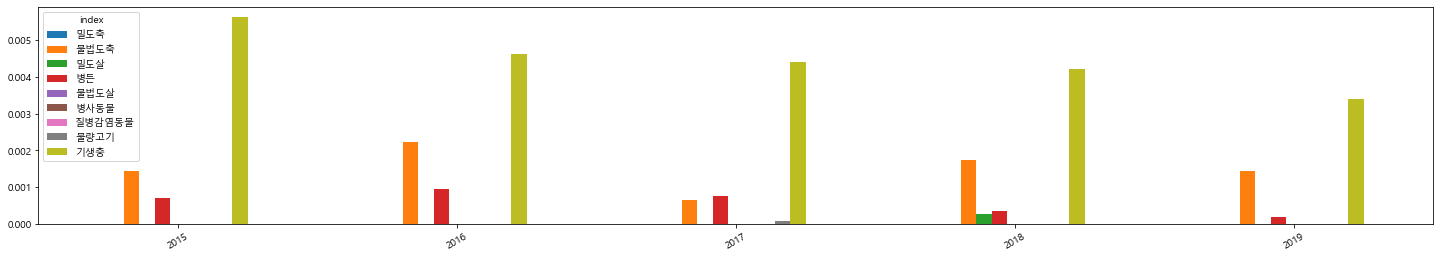

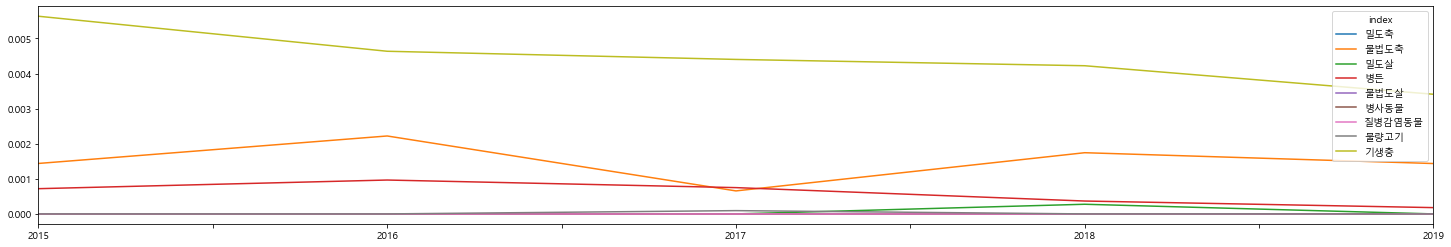

In [21]:
plt.rcParams['font.family']='Malgun Gothic'
for num, cols in enumerate(keysInterestDic_list[0:5]) :
    # 막대그래프
    tf.T[cols].plot.bar(rot='30', figsize=(25,4))
    plt.savefig('../1399_working/년도별주제어빈도수_막대_' + str(num) + '.png')
    # 라인그래프
    tf.T[cols].plot.line(figsize=(25,4))
    plt.savefig('../1399_working/년도별주제어빈도수_분포_' + str(num) + '.png')

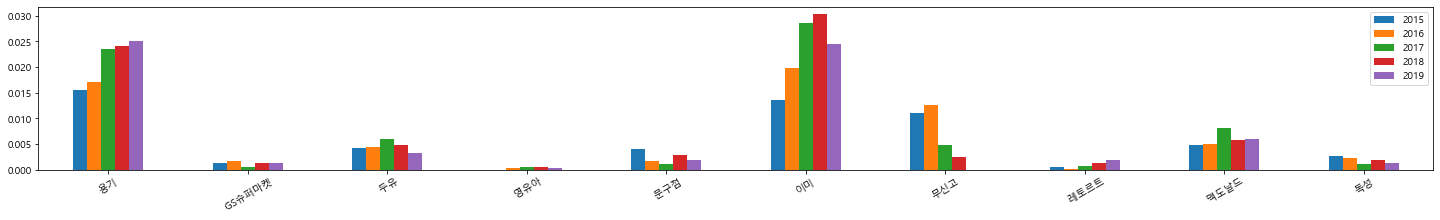

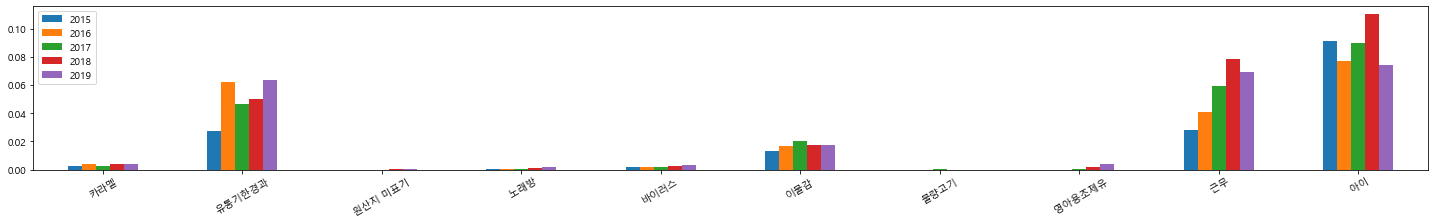

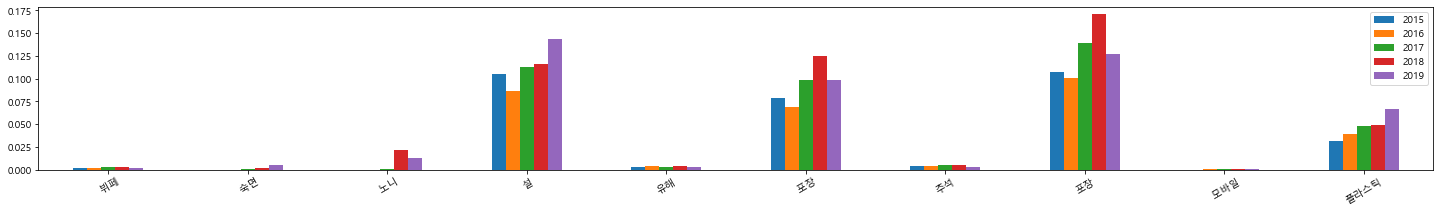

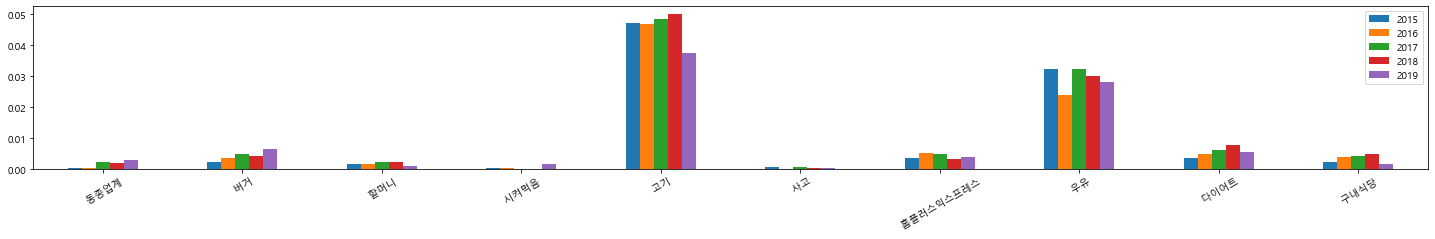

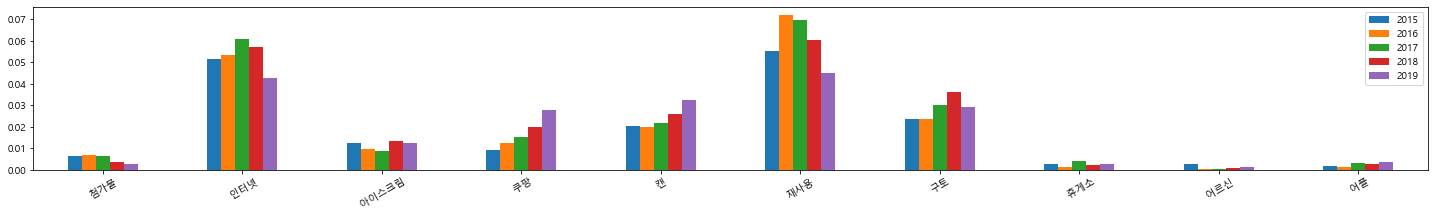

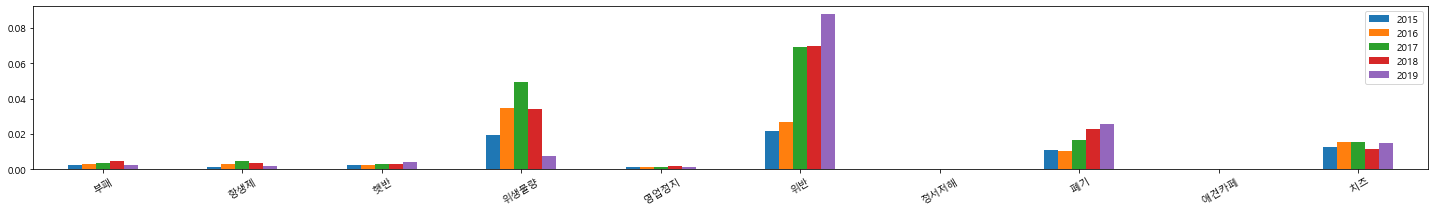

In [39]:
for i in np.linspace(0,50, 6) : # 10개씩 그리기
    result_df2[(result_df2.T != 0).any()][int(i):int(i+10)].plot.bar(rot='30', figsize=(25,3))

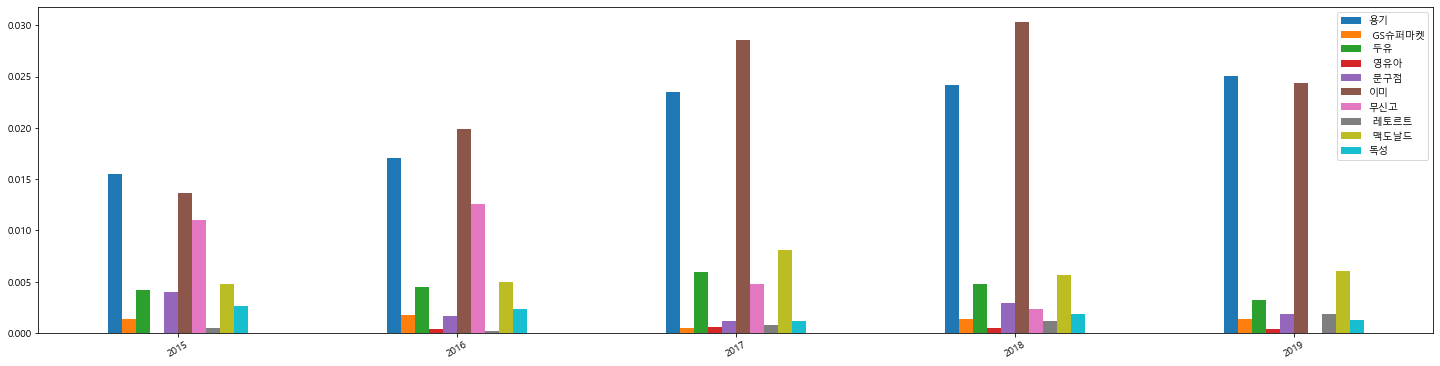

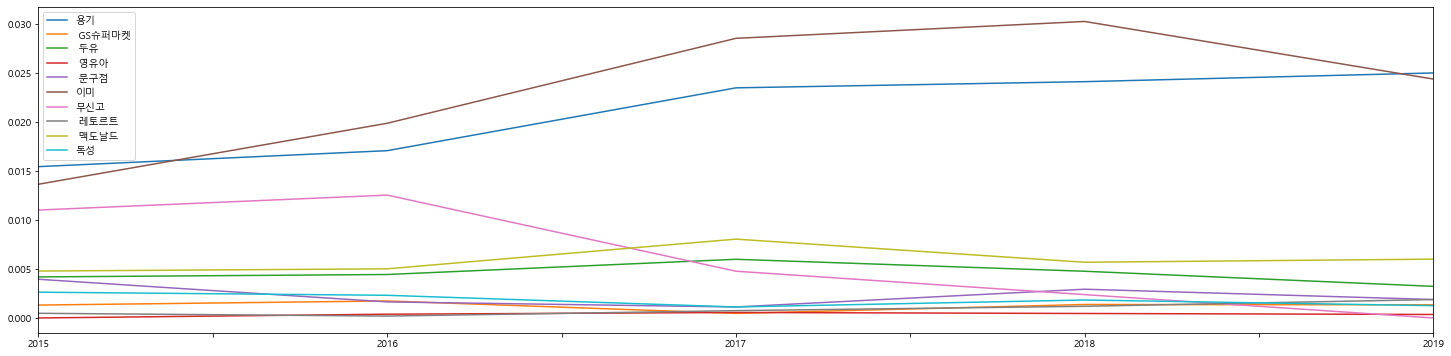

In [24]:
result_df2[(result_df2.T != 0).any()][0:10].T.plot.bar(rot='30', figsize=(25,6))
result_df2[(result_df2.T != 0).any()][0:10].T.plot.line(figsize=(25,6))

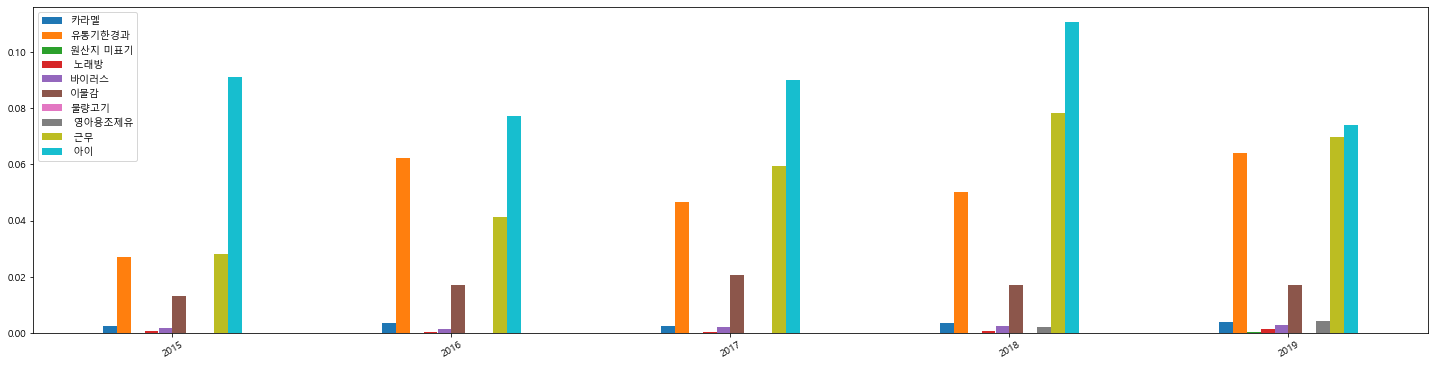

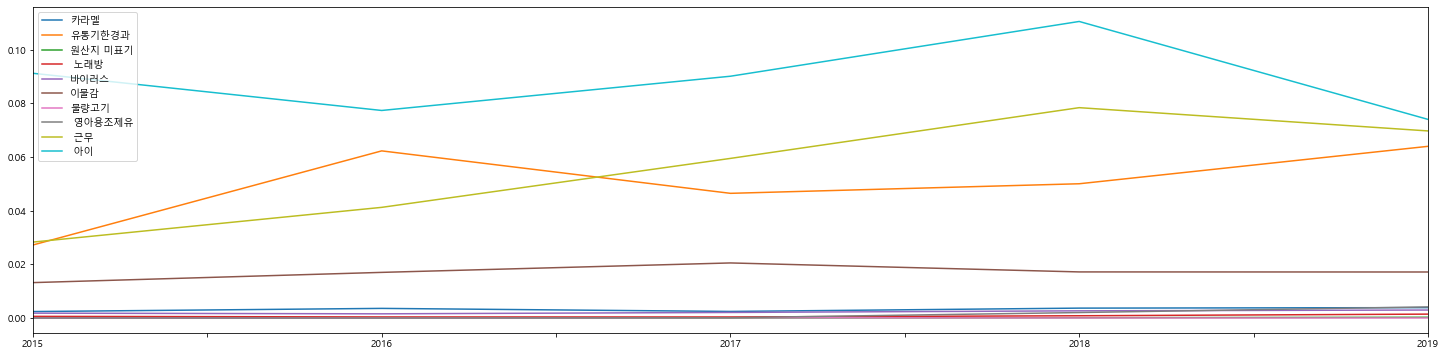

In [25]:
result_df2[(result_df2.T != 0).any()][10:20].T.plot.bar(rot='30', figsize=(25,6))
result_df2[(result_df2.T != 0).any()][10:20].T.plot.line(figsize=(25,6))

## <font color='green'> 6.2. Option - B
- 관심주제어의 빈도를 확인
- df.sample()로 표본추출하여 빈도수가 없는 관심주제어 발생 가능

In [97]:
tf = pd.read_excel("../1399_data/관심주제어.xlsx").sample(frac=0.05, random_state= 1234)
tf['주제어'] = tf['주제어'].apply(lambda x : str(x).strip())

counts =[]
for kw in tqdm_notebook(tf.주제어) :
    regex=re.compile(kw)
    df[kw] = df['신고내용'].apply(lambda x: len(regex.findall(x)))
    counts.append(df['신고내용'].apply(lambda x: len(regex.findall(x))).sum())

tf['frequency'] = counts
tf

,유형,주제어,신유형,frequency
146,소비패턴,쿠팡,소비패턴,965
54,사용이 금지된 물질함유 식품,마약류,미승인,0
80,"성수식품(절기,계절,기념일)",대대,성수기,148
90,"성수식품(절기,계절,기념일)",아이스크림,성수기,719
208,식품분류,효과,식품분류,378
37,"불법도축, 병든 고기나 그 원료로 만든 식품",밀도축,불법도축,0
141,소비패턴,인터넷사이트,소비패턴,114
315,조사결과,반복,행정처분,184
7,병원성 미생물 등에 오염된 위해우려 식품,식중독,미생물,1158
311,"제품의 성분(함량)품질, 가격을 속인 식품",품질위조,경제적이득,0


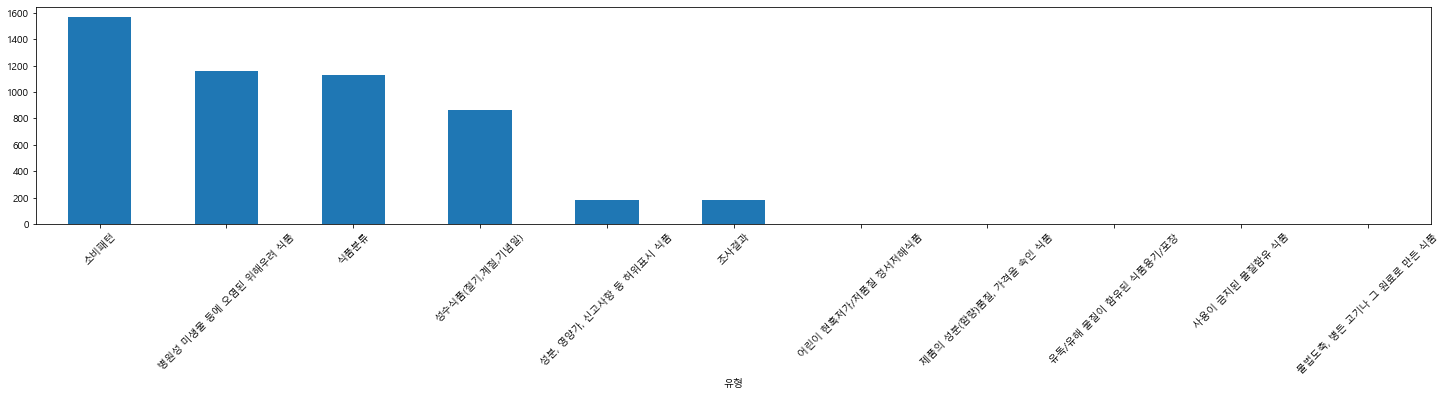

In [98]:
tf.groupby('유형')['frequency'].sum().sort_values(ascending=False).plot(kind='bar', rot='45', figsize=(25,4)) 

### <font color='green'> 년도별로 관심주제어 빈도 분석 using groupby

#### 관심주제어를 컬럼으로 만든 데이터를 사용 (기본과제_제2장3절_관심주제어분석_관심주제어행렬구성.ipynb)

In [100]:
df = pd.read_pickle('../1399_output/dataset_keywords.pkl')
df['년도']=df['신고일시'].apply(lambda x: x.year)

tf = df.drop(['내용'], axis=1)
tf


tf_year = tf.groupby('년도').sum()
tf_year['총빈도'] = tf_year.sum(axis=1)
tf_year

,신고일시,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,...,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단,년도
0,2015-01-02 00:00:00,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015.0
1,2015-01-02 00:00:00,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2015.0
2,2015-01-02 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015.0
3,2015-01-02 00:00:00,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2015.0
4,2015-01-02 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52879,2019-12-31 17:26:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019.0
52880,2019-12-31 11:28:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019.0
52881,2019-12-31 10:27:00,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019.0
52882,2019-12-31 09:16:00,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2019.0


,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단,총빈도
년도,,,,,,,,,,,,,,,,,,,,,
2015.0,258,894,102,754,661,74,20,435,635,39,...,1,17,161,88,1,3,42,41,1,26483
2016.0,393,1314,117,891,834,103,28,600,842,74,...,0,10,265,104,0,2,24,66,3,34677
2017.0,442,1396,153,897,943,94,33,888,839,82,...,8,42,242,155,2,6,25,70,7,39381
2018.0,392,1230,140,905,862,98,32,599,874,59,...,7,31,421,231,4,4,44,51,4,43145
2019.0,411,938,143,989,783,94,25,498,806,55,...,5,24,365,274,0,0,34,49,5,44337


In [101]:
for col in tf_year.columns :
    tf_year[col] = round((tf_year[col] / tf_year['총빈도'])*100,2)
    
tf_year

tf_year.to_excel('../1399_output/frequency.xlsx')

,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단,총빈도
년도,,,,,,,,,,,,,,,,,,,,,
2015.0,0.97,3.38,0.39,2.85,2.50,0.28,0.08,1.64,2.40,0.15,...,0.00,0.06,0.61,0.33,0.00,0.01,0.16,0.15,0.00,100.0
2016.0,1.13,3.79,0.34,2.57,2.41,0.30,0.08,1.73,2.43,0.21,...,0.00,0.03,0.76,0.30,0.00,0.01,0.07,0.19,0.01,100.0
2017.0,1.12,3.54,0.39,2.28,2.39,0.24,0.08,2.25,2.13,0.21,...,0.02,0.11,0.61,0.39,0.01,0.02,0.06,0.18,0.02,100.0
2018.0,0.91,2.85,0.32,2.10,2.00,0.23,0.07,1.39,2.03,0.14,...,0.02,0.07,0.98,0.54,0.01,0.01,0.10,0.12,0.01,100.0
2019.0,0.93,2.12,0.32,2.23,1.77,0.21,0.06,1.12,1.82,0.12,...,0.01,0.05,0.82,0.62,0.00,0.00,0.08,0.11,0.01,100.0


#### <font color='green'> 5년동안 한번도 출현하지 않은 단어는 제거

In [102]:
tf_year.T[tf_year.T.sum(axis=1).sort_values() == 0].index
tf_year.T[tf_year.T.sum(axis=1).sort_values() <= 3].index
#빈도수 100보다 적은 컬럼 제외
tf_year = tf_year.drop(tf_year.T[tf_year.T.sum(axis=1).sort_values() <= 3].index, axis=1) 

Index(['동물용의약품', '곰팡이독소', '유독물질', '패독', '버섯독', '마약류', '유전자조작', '비식용', '불법첨가제',
       '멜라민', '미승인', '밀도축', '밀도살', '불법도살', '불량고기', '질병감염동물', '병사동물', '가소재',
       '중금속용출', '증발잔류물', '가소제용출', '총용출량', '원료성분용출', '잔류규격위반', '벤조피렌', '다이옥신',
       '세균수', '위생제조기준위반', '강아지, 개, 고양이, 애완동물', '밀수입', '밀반입', '짝퉁', '불법증량',
       '불량품질', '불향성분', '상표도용', '원료건전성불량', '저급원료혼합', '유사성분혼입', '품질위조', '병원성균',
       '규격미달', '기준미달', '부적합 성분', '성분함량 규격위반', '품질규격위반', '원산지허위', '원산지 속인',
       '허위과장', '소비자혼동', '정서저해', '건강관련식품', '데워먹는', '해외사업자', '이마트애브리데이', '스터디카페',
       '애견카페', '유흥업소', '티브이', '품목제조정지'],
      dtype='object')

Index(['썩은', '구더기', '부패', '악취', '유해', '농약', '독성', '항생제', '발암물질', '방부제',
       ...
       '고발', '품목제조정지', '시정명령', '적합', '폐기', '판매중단', '시험검사', '반복', '오인', '차단'],
      dtype='object', length=263)

In [103]:
tf_year

,상한,변질,곰팡이,벌레,불량,냄새,유통기한경과,포장,이물혼입,이물질,...,배달,치킨,설,선물,김치,아이,식품위생법,근무,회수,총빈도
년도,,,,,,,,,,,,,,,,,,,,,
2015.0,0.97,3.38,2.85,2.50,1.64,2.40,0.71,2.42,0.32,3.00,...,1.05,0.73,3.33,0.66,0.98,2.21,0.23,0.74,0.61,100.0
2016.0,1.13,3.79,2.57,2.41,1.73,2.43,1.44,2.04,0.44,2.21,...,1.06,0.75,2.62,0.69,0.98,1.86,0.55,1.01,0.76,100.0
2017.0,1.12,3.54,2.28,2.39,2.25,2.13,1.05,2.68,1.34,1.34,...,1.14,0.78,2.89,0.59,0.94,1.92,0.94,1.32,0.61,100.0
2018.0,0.91,2.85,2.10,2.00,1.39,2.03,1.00,3.18,1.44,2.22,...,1.06,0.75,2.90,0.53,0.92,2.04,0.93,1.52,0.98,100.0
2019.0,0.93,2.12,2.23,1.77,1.12,1.82,1.54,2.34,1.12,1.14,...,1.13,0.73,3.46,0.59,0.82,1.57,2.05,1.48,0.82,100.0


Text(0.5, 1.0, 'Heatmap of Flight by seaborn')

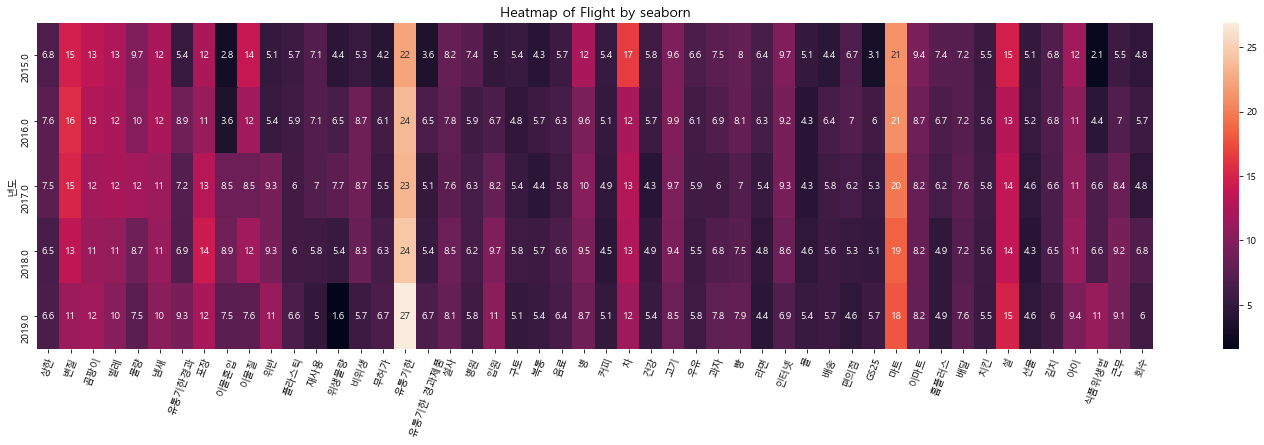

In [115]:
fig, ax = plt.subplots(figsize=(25,6))  
#ax = sns.heatmap(tf_year.drop('년도 총 빈도', axis=1), annot=True)
ax = sns.heatmap((np.log(1+ tf_year)*10).drop('총빈도', axis=1), annot=True)
ax.tick_params(axis='x', rotation=70)
plt.title('Heatmap of Flight by seaborn', fontsize=14)
plt.show() # https://dailyheumsi.tistory.com/98

In [116]:
tf_year
tf_year.to_excel('../1399_output/년도별_관심주제어빈도비중.xlsx')

,상한,변질,곰팡이,벌레,불량,냄새,유통기한경과,포장,이물혼입,이물질,...,배달,치킨,설,선물,김치,아이,식품위생법,근무,회수,총빈도
년도,,,,,,,,,,,,,,,,,,,,,
2015.0,0.97,3.38,2.85,2.50,1.64,2.40,0.71,2.42,0.32,3.00,...,1.05,0.73,3.33,0.66,0.98,2.21,0.23,0.74,0.61,100.0
2016.0,1.13,3.79,2.57,2.41,1.73,2.43,1.44,2.04,0.44,2.21,...,1.06,0.75,2.62,0.69,0.98,1.86,0.55,1.01,0.76,100.0
2017.0,1.12,3.54,2.28,2.39,2.25,2.13,1.05,2.68,1.34,1.34,...,1.14,0.78,2.89,0.59,0.94,1.92,0.94,1.32,0.61,100.0
2018.0,0.91,2.85,2.10,2.00,1.39,2.03,1.00,3.18,1.44,2.22,...,1.06,0.75,2.90,0.53,0.92,2.04,0.93,1.52,0.98,100.0
2019.0,0.93,2.12,2.23,1.77,1.12,1.82,1.54,2.34,1.12,1.14,...,1.13,0.73,3.46,0.59,0.82,1.57,2.05,1.48,0.82,100.0


In [117]:
key_interest = df.drop(['년도'], axis=1)
key_interest.set_index('신고일시', inplace= True)

In [118]:
key_interest.resample('Y').mean()
key_interest.resample('Q').mean()

,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
신고일시,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.030924,0.107156,0.012226,0.090375,0.079228,0.008870,0.002397,0.052140,0.076112,0.004675,...,0.0,0.000120,0.002038,0.019298,0.010548,0.000120,0.000360,0.005034,0.004914,0.000120
2016-12-31,0.037953,0.126895,0.011299,0.086045,0.080541,0.009947,0.002704,0.057943,0.081313,0.007146,...,0.0,0.000000,0.000966,0.025592,0.010043,0.000000,0.000193,0.002318,0.006374,0.000290
2017-12-31,0.041405,0.130773,0.014333,0.084028,0.088337,0.008806,0.003091,0.083185,0.078595,0.007681,...,0.0,0.000749,0.003934,0.022670,0.014520,0.000187,0.000562,0.002342,0.006557,0.000656
2018-12-31,0.035851,0.112493,0.012804,0.082769,0.078837,0.008963,0.002927,0.054783,0.079934,0.005396,...,0.0,0.000640,0.002835,0.038504,0.021127,0.000366,0.000366,0.004024,0.004664,0.000366
2019-12-31,0.036775,0.083930,0.012795,0.088493,0.070061,0.008411,0.002237,0.044560,0.072119,0.004921,...,0.0,0.000447,0.002147,0.032659,0.024517,0.000000,0.000000,0.003042,0.004384,0.000447


,상한,변질,썩은,곰팡이,벌레,구더기,부패,불량,냄새,악취,...,품목제조정지,시정명령,적합,회수,폐기,판매중단,시험검사,반복,오인,차단
신고일시,,,,,,,,,,,,,,,,,,,,,
2015-03-31,0.031356,0.082007,0.008201,0.065123,0.056440,0.006271,0.001447,0.046792,0.066088,0.001930,...,0.0,0.000000,0.002412,0.019778,0.009165,0.000000,0.000482,0.004824,0.003377,0.000000
2015-06-30,0.028317,0.091019,0.011731,0.082120,0.070388,0.005663,0.003236,0.061489,0.066748,0.006068,...,0.0,0.000000,0.002427,0.014968,0.012540,0.000000,0.000809,0.008091,0.007282,0.000405
2015-09-30,0.032999,0.133788,0.015065,0.112267,0.097202,0.012195,0.002511,0.046628,0.082496,0.005022,...,0.0,0.000359,0.001435,0.018651,0.011478,0.000359,0.000000,0.003945,0.003587,0.000000
2015-12-31,0.030693,0.124752,0.013861,0.101980,0.098020,0.012871,0.001980,0.055446,0.101980,0.005941,...,0.0,0.000000,0.001980,0.030693,0.005941,0.000000,0.000000,0.000990,0.005941,0.000000
2016-03-31,0.031030,0.115186,0.010343,0.070992,0.056888,0.005642,0.003291,0.061589,0.084626,0.003291,...,0.0,0.000000,0.000470,0.028209,0.011754,0.000000,0.000470,0.002351,0.007522,0.000000
2016-06-30,0.032873,0.119910,0.008965,0.084423,0.076578,0.010833,0.003362,0.051924,0.080687,0.006350,...,0.0,0.000000,0.001494,0.025028,0.009712,0.000000,0.000000,0.002615,0.007471,0.000747
2016-09-30,0.049934,0.139290,0.013798,0.094612,0.099540,0.012484,0.002300,0.058147,0.074573,0.007884,...,0.0,0.000000,0.000986,0.025624,0.010512,0.000000,0.000329,0.001971,0.004599,0.000000
2016-12-31,0.034703,0.129238,0.011568,0.090148,0.081771,0.009573,0.001994,0.061029,0.087355,0.010371,...,0.0,0.000000,0.000798,0.023933,0.008377,0.000000,0.000000,0.002393,0.006382,0.000399
2017-03-31,0.032178,0.109901,0.012871,0.062376,0.050000,0.004950,0.001980,0.051485,0.074752,0.005446,...,0.0,0.000000,0.002475,0.027228,0.010891,0.000000,0.000000,0.001485,0.006931,0.000990


In [119]:
key_interest.resample('Y').mean().to_excel('../1399_output/년도별신고건수대비_관심주제어빈도_평균빈도.xlsx')
key_interest.resample('Q').mean().to_excel('../1399_output/년도별신고건수대비_관심주제어빈도비중.xlsx')

# <font color='red'> END